In [20]:
# uploaded dataset in Google Drive , Extracting  It from Drive itself
file_id  = '1pxjMjtOrsmHJ7IT-AtCET2xABg2I56Iz'
download_url = f'https://drive.google.com/uc?id={file_id}&export=download'

# importing  pandas for data manipulation
import pandas as pd
data = pd.read_csv(download_url, encoding='latin-1')

#data display  for first five rows


data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [21]:
#check for null values and duplicates values  and statistics and also total info of the dataset
display(data.shape)

data.isnull().sum()

data.drop_duplicates

#after dropping duplicates shape of dataset
display(data.shape)

display(data.describe())

display(data.info())

data.dropna()


(545, 13)

(545, 13)

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [22]:
# change binary columns to numerical for model training ...
data_conversion = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
mapping = {'yes':1,'no':0}

for col in data_conversion :
    data[col] = data[col].map(mapping)


In [23]:
data_conversion1 = ['furnishingstatus']
mapping1 = {'furnished':2,'semi-furnished':1,'unfurnished':0}

for col in data_conversion1 :
    data[col] = data[col].map(mapping1)

In [24]:
display(data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


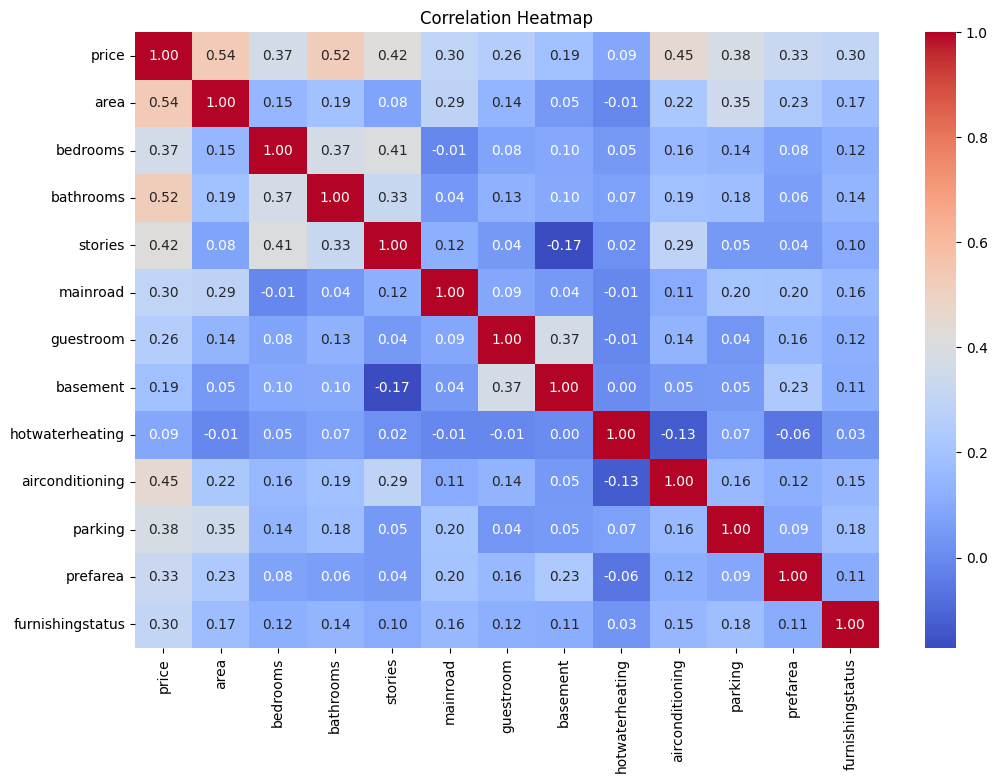

In [25]:
#from above dataset we can say that price was the target variable... as we all know that price of the house is mostly depend upon all other features...
import matplotlib.pyplot as plt
import seaborn as sns

# general correaltion heatmap for .. measuring dependancy ..
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



In [29]:
# from above price was depend upon all other features .. so we should select features other than target varaibale for furthuer model  training
X = data.drop('price', axis=1)
Y = data['price']


In [32]:
# split the dataset into training and testing dataset .. we will take 75 25 share  as traintest split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [33]:
#split completed now model introducing .. in this we are training linear regression model : it should explain how the relation between dependent and independent varaibles ..
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [34]:
# model fitting  or model training completed now.. time to predict the  outcome . for above ...
Y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

MSE = mean_squared_error(Y_test, Y_pred)
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
r2 = r2_score(Y_test, Y_pred)

display("\nModel Performance:")
display(f"Mean Squared Error: {MSE}")
display(f"Root Mean Squared Error: {RMSE}")
display(f"Mean Absolute Percentage Error: {MAPE}%")
display(f"R-squared Score: {r2}")
display(f'accuracy : {r2 * 100 }')

'\nModel Performance:'

'Mean Squared Error: 1560062846482.4194'

'Root Mean Squared Error: 1249024.7581543047'

'Mean Absolute Percentage Error: 20.97486925071973%'

'R-squared Score: 0.6614628548582817'

'accuracy : 66.14628548582817'

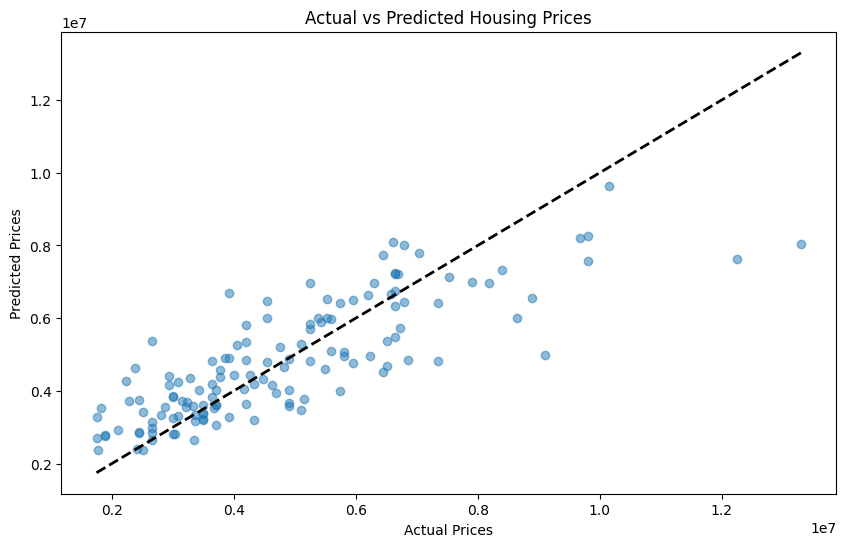

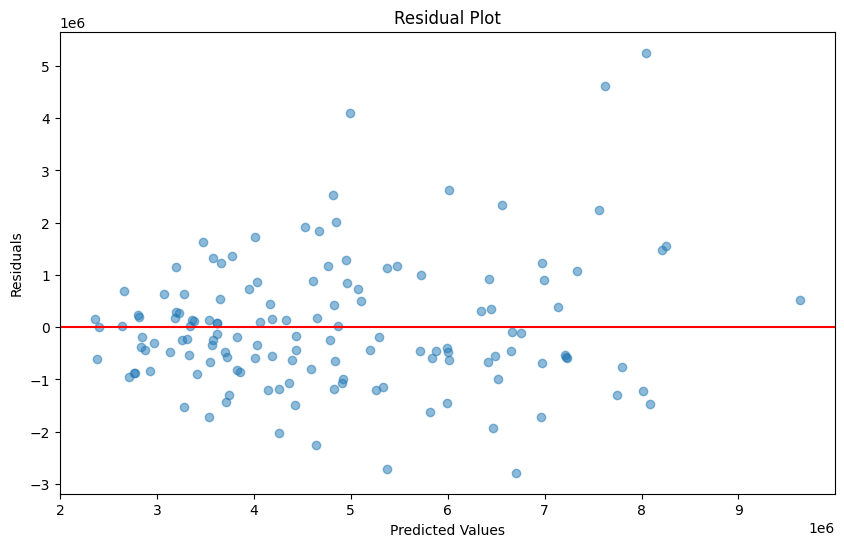

In [37]:
# visual insights from abvoe
# Actual vs Predicted values plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.show()

# Residual plot
residuals = Y_test - Y_pred
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

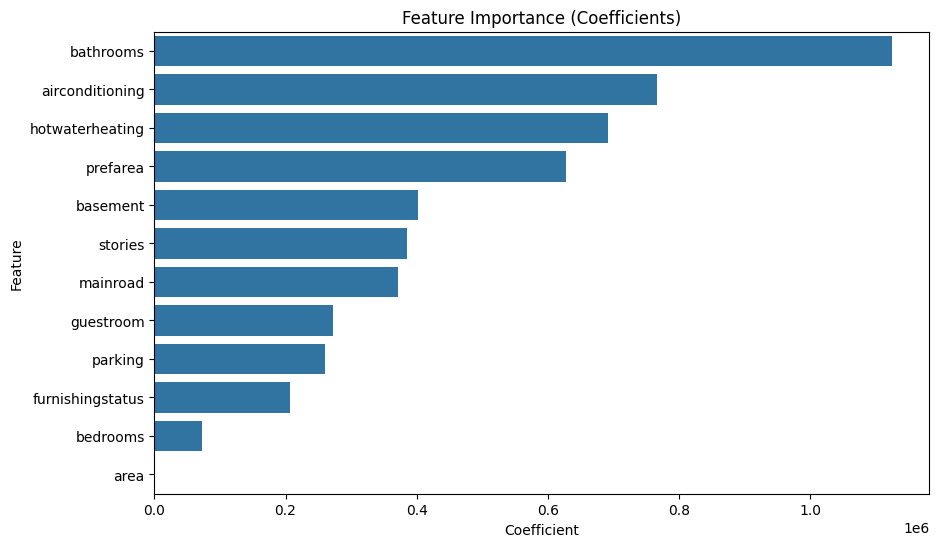

In [38]:
# Feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Coefficients)')
plt.show()